In [1]:
from trainer import Trainer

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import matplotlib.pyplot as plt

# Setup

In [4]:
path = "./data/iliad_sentiments.csv"
target = "class"

In [102]:
'''scenarios = {
    "TF-IDF sem lematização": {"lemmatize": False, "sbert": False},
    "TF-IDF com lematização": {"lemmatize": True, "sbert": False},
    "SBERT com lematização": {"lemmatize": False, "sbert": True},
           }'''

scenarios = {
    "TF-IDF sem lematização": {"lemmatize": False, "sbert": False},
    "TF-IDF com lematização": {"lemmatize": True, "sbert": False}
           }

classifiers = {
    "Decision Tree": DecisionTreeClassifier(), 
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

STANDARD = "Sem modificação"
WITHOUT_NARRATOR = "Sem narrador"
MERGE_NARRATOR_NEUTRAL = "Junção de narrador e neutro"

data_operations = [STANDARD, WITHOUT_NARRATOR, MERGE_NARRATOR_NEUTRAL]

nro_folds = 5

# Trainer

In [103]:
'''metrics = {}

for operation in data_operations:
    metrics[operation] = {}

for scenario in scenarios:
    for operation in data_operations:
        trainer = Trainer(path, target)
        
        if operation == STANDARD:
            trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
        if operation == WITHOUT_NARRATOR:
            trainer.remove_class(["narrator"])
            trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
        elif operation == MERGE_NARRATOR_NEUTRAL:
            trainer.merge_class(["narrator"], "neutral")
            trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
    
        for classifier in classifiers:
            metrics[operation][classifier] = {}

        for classifier in classifiers:
            metrics[operation][classifier][scenario] = trainer.cross_validation(model=classifiers[classifier], nro_folds=nro_folds)'''

C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

In [104]:
metrics = {}

for classifier in classifiers:  
    metrics[classifier] = {}
        
    for scenario in scenarios: 
        metrics[classifier][scenario] = {}

for classifier in classifiers:       
    for scenario in scenarios: 
        for operation in data_operations:
            trainer = Trainer(path, target)

            if operation == STANDARD:
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
            if operation == WITHOUT_NARRATOR:
                trainer.remove_class(["narrator"])
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
            elif operation == MERGE_NARRATOR_NEUTRAL:
                trainer.merge_class(["narrator"], "neutral")
                trainer.prepare_data_to_train(lemmatize=scenarios[scenario]["lemmatize"], sbert=scenarios[scenario]["sbert"])
                
            metrics[classifier][scenario][operation] = trainer.cross_validation(model=classifiers[classifier], nro_folds=nro_folds)
            print(f"{classifier} : {scenario} : {operation}")
            print(metrics[classifier][scenario][operation])
            print("=======================")


Decision Tree : TF-IDF sem lematização : Sem modificação
{'accuracy': [59, 55, 53, 51, 56], 'recall': [44.33008658008658, 42.39485370950888, 40.104166666666664, 33.01524864024864, 41.004876349703935], 'precision': [56.56415343915344, 47.18005952380953, 36.46153846153845, 34.85239703989704, 42.07472297094939]}
Decision Tree : TF-IDF sem lematização : Sem narrador
{'accuracy': [44, 41, 51, 41, 48], 'recall': [33.881886087768436, 28.897435897435898, 37.54648526077098, 29.71781305114638, 33.813131313131315], 'precision': [34.049773755656105, 28.16967792615868, 38.86185801678759, 35.6596876038551, 34.72131681877445]}
Decision Tree : TF-IDF sem lematização : Junção de narrador e neutro
{'accuracy': [56, 56, 55, 56, 57], 'recall': [43.195402298850574, 44.21630094043887, 42.55952380952381, 43.531468531468526, 45.51724137931035], 'precision': [49.83443421577296, 47.04162366701066, 41.848233003893384, 49.78354978354978, 47.53151260504202]}
Decision Tree : TF-IDF com lematização : Sem modificação

C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

KNN : TF-IDF sem lematização : Junção de narrador e neutro
{'accuracy': [52, 52, 50, 45, 45], 'recall': [40.22779519331243, 39.18495297805642, 37.73148148148148, 34.03263403263403, 38.249738766980144], 'precision': [57.63403263403263, 54.43226896037076, 51.731738638759516, 55.55555555555555, 45.79365079365079]}


C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

KNN : TF-IDF com lematização : Sem modificação
{'accuracy': [32, 53, 42, 41, 31], 'recall': [20.338203463203463, 27.04741379310345, 23.809523809523807, 27.394133644133646, 24.120515499825846], 'precision': [42.42050438596491, 51.54109589041096, 38.03258145363409, 76.06617647058823, 45.138888888888886]}


C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

KNN : TF-IDF com lematização : Sem narrador
{'accuracy': [38, 45, 47, 43, 46], 'recall': [25.198412698412696, 29.512820512820515, 31.700680272108844, 28.835978835978835, 32.33585858585858], 'precision': [30.00413564929694, 32.5, 36.622807017543856, 27.670471173544044, 47.2706155632985]}


C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

KNN : TF-IDF com lematização : Junção de narrador e neutro
{'accuracy': [34, 58, 45, 44, 35], 'recall': [25.96133751306165, 41.89655172413793, 33.5978835978836, 34.03263403263403, 30.679205851619646], 'precision': [47.83051378446115, 57.6103500761035, 47.376775271512116, 63.32633053221289, 39.550264550264544]}


C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : TF-IDF sem lematização : Sem modificação
{'accuracy': [36, 43, 28, 28, 33], 'recall': [25.585497835497833, 26.391065830721004, 20.535714285714285, 15.506021756021754, 18.35379658655521], 'precision': [63.52272727272727, 53.13438438438438, 36.24113475177305, 46.74674674674675, 52.98645320197044]}


C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : TF-IDF sem lematização : Sem narrador
{'accuracy': [31, 34, 39, 34, 33], 'recall': [22.397292250233427, 22.230769230769234, 27.854875283446713, 22.57495590828924, 23.838383838383837], 'precision': [60.626566416040106, 28.493609888958726, 65.94202898550724, 28.223270440251575, 42.56410256410256]}
Random Forest : TF-IDF sem lematização : Junção de narrador e neutro
{'accuracy': [35, 44, 35, 33, 39], 'recall': [27.138975966562175, 35.85684430512017, 26.65343915343915, 24.825174825174827, 29.88505747126437], 'precision': [62.5, 64.25438596491229, 44.33229813664596, 50.18018018018019, 60.36578374039675]}


C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : TF-IDF com lematização : Sem modificação
{'accuracy': [49, 53, 47, 45, 44], 'recall': [33.61093073593074, 31.74960815047022, 29.315476190476186, 25.602175602175603, 26.828631138975968], 'precision': [74.3452380952381, 47.23816355810617, 41.45167895167895, 49.831460674157306, 45.57589626239512]}


C:\Users\Rafael Oleques\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest : TF-IDF com lematização : Sem narrador
{'accuracy': [38, 45, 50, 48, 52], 'recall': [25.175070028011206, 29.102564102564106, 35.460317460317455, 30.511463844797177, 34.734848484848484], 'precision': [57.61904761904761, 30.456349206349202, 68.16239316239317, 32.078853046594986, 47.145061728395056]}
Random Forest : TF-IDF com lematização : Junção de narrador e neutro
{'accuracy': [55, 56, 51, 47, 45], 'recall': [40.38140020898642, 39.2894461859979, 34.06084656084656, 35.72261072261072, 34.60292580982236], 'precision': [65.96166556510245, 60.277777777777786, 46.804511278195484, 57.850241545893724, 44.98022706977931]}


In [105]:
import matplotlib.pyplot as plt

def compare_boxplot(dict_metrics, labels, width=22, height=10):
    plots = []
    result = {}
    
    for model in dict_metrics:
        result[model] = {}
    
    #plot
    for model in dict_metrics:
        #line
        for scenario in dict_metrics[model]:
            if scenario not in result[model]:
                result[model][scenario] = {}
            #Values
            for data_operation in dict_metrics[model][scenario]:
                for metric in dict_metrics[model][scenario][data_operation]:
                    if metric not in result[model][scenario]:
                        result[model][scenario][metric] = []
                        result[model][scenario][metric].append(dict_metrics[model][scenario][data_operation][metric])
                    else:
                        result[model][scenario][metric].append(dict_metrics[model][scenario][data_operation][metric])
    
    for title in result:
        number_type_trainers = len(result[title])

        firts_key = list(result[title].keys())[0]
        number_metrics = len(result[title][firts_key])

        print(number_type_trainers, number_metrics)
        
        fig, ax = plt.subplots(number_type_trainers, number_metrics, figsize=(width, height))
        print(ax.shape)
        fig.suptitle(title)
        print(title)

        scenarios = result[title]

        for idx_scenario, scenario in enumerate(scenarios):
            metrics = scenarios[scenario]
            for idx_metric, metric in enumerate(metrics):
                results=[]

                for values in metrics[metric]:
                    results.append(values)

                #ax[idx_scenario][idx_metric].set_ylim(bottom=0, top=100)
                print(idx_scenario, idx_metric, results)
                ax[idx_scenario][idx_metric].boxplot(results, labels=labels, showmeans=True)
        
                ax[idx_scenario][idx_metric].set_title(metric)


2 3
(2, 3)
Decision Tree
0 0 [[59, 55, 53, 51, 56], [44, 41, 51, 41, 48], [56, 56, 55, 56, 57]]
0 1 [[44.33008658008658, 42.39485370950888, 40.104166666666664, 33.01524864024864, 41.004876349703935], [33.881886087768436, 28.897435897435898, 37.54648526077098, 29.71781305114638, 33.813131313131315], [43.195402298850574, 44.21630094043887, 42.55952380952381, 43.531468531468526, 45.51724137931035]]
0 2 [[56.56415343915344, 47.18005952380953, 36.46153846153845, 34.85239703989704, 42.07472297094939], [34.049773755656105, 28.16967792615868, 38.86185801678759, 35.6596876038551, 34.72131681877445], [49.83443421577296, 47.04162366701066, 41.848233003893384, 49.78354978354978, 47.53151260504202]]
1 0 [[61, 55, 52, 44, 48], [41, 53, 55, 54, 54], [53, 62, 56, 49, 54]]
1 1 [[45.611471861471856, 42.62016718913271, 37.27678571428572, 25.067987567987565, 39.7313653779171], [34.78057889822596, 34.53846153846154, 40.25396825396825, 35.62610229276896, 36.65404040404041], [42.79728317659352, 48.0198537095

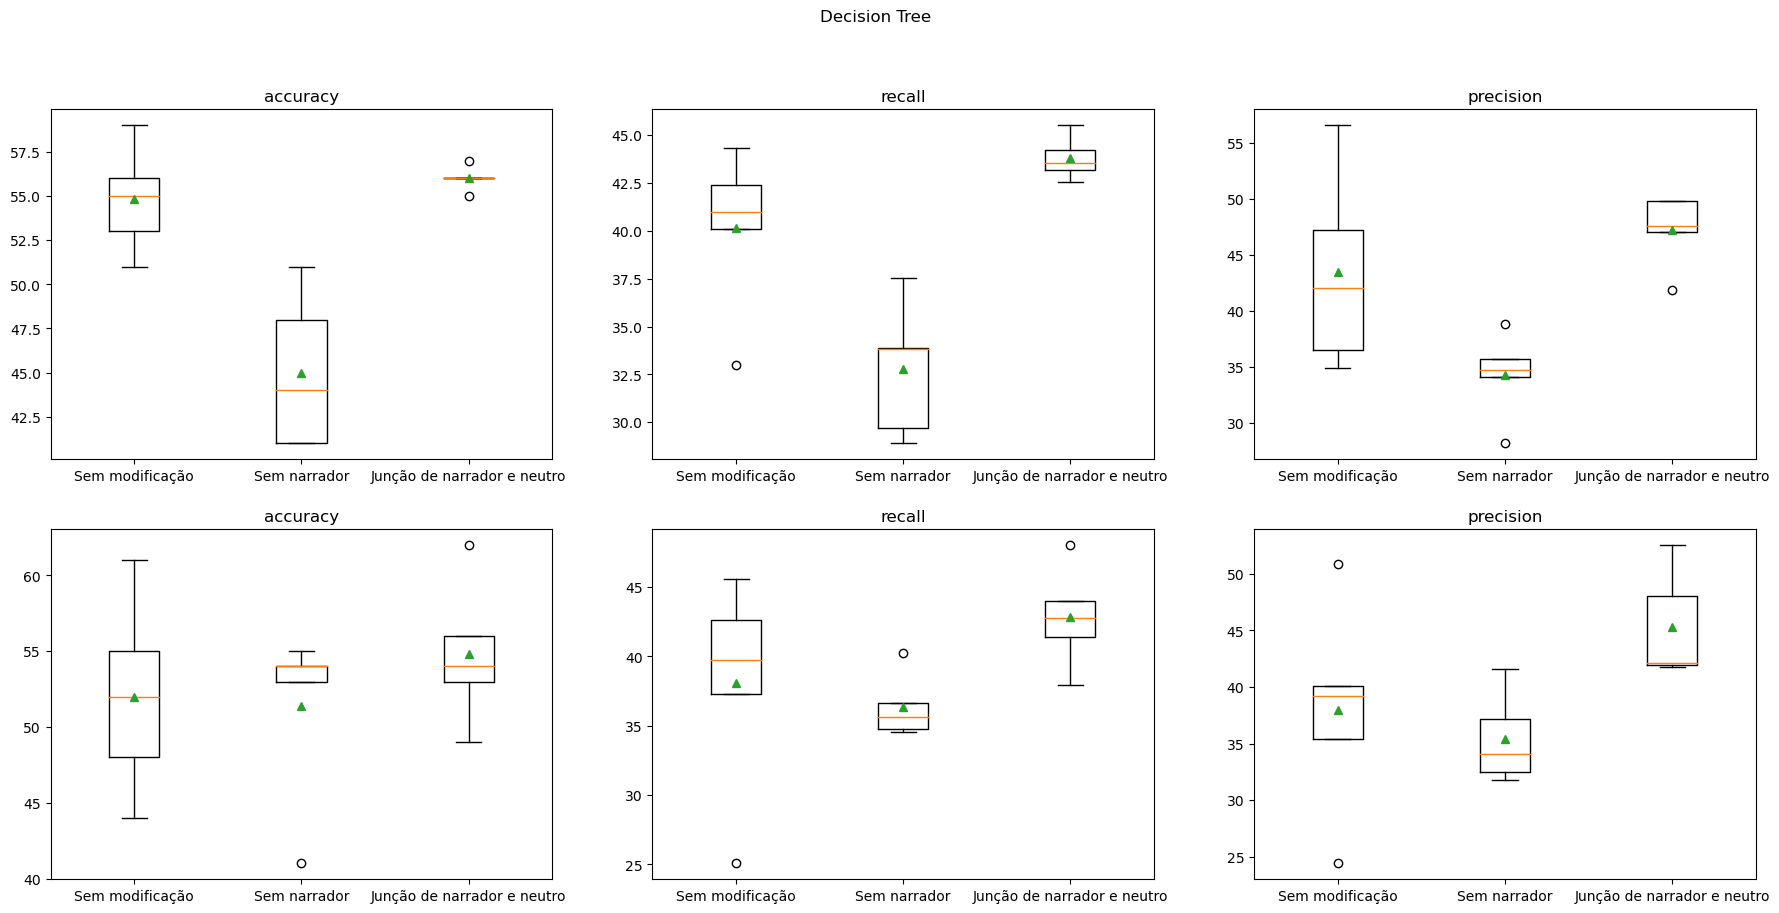

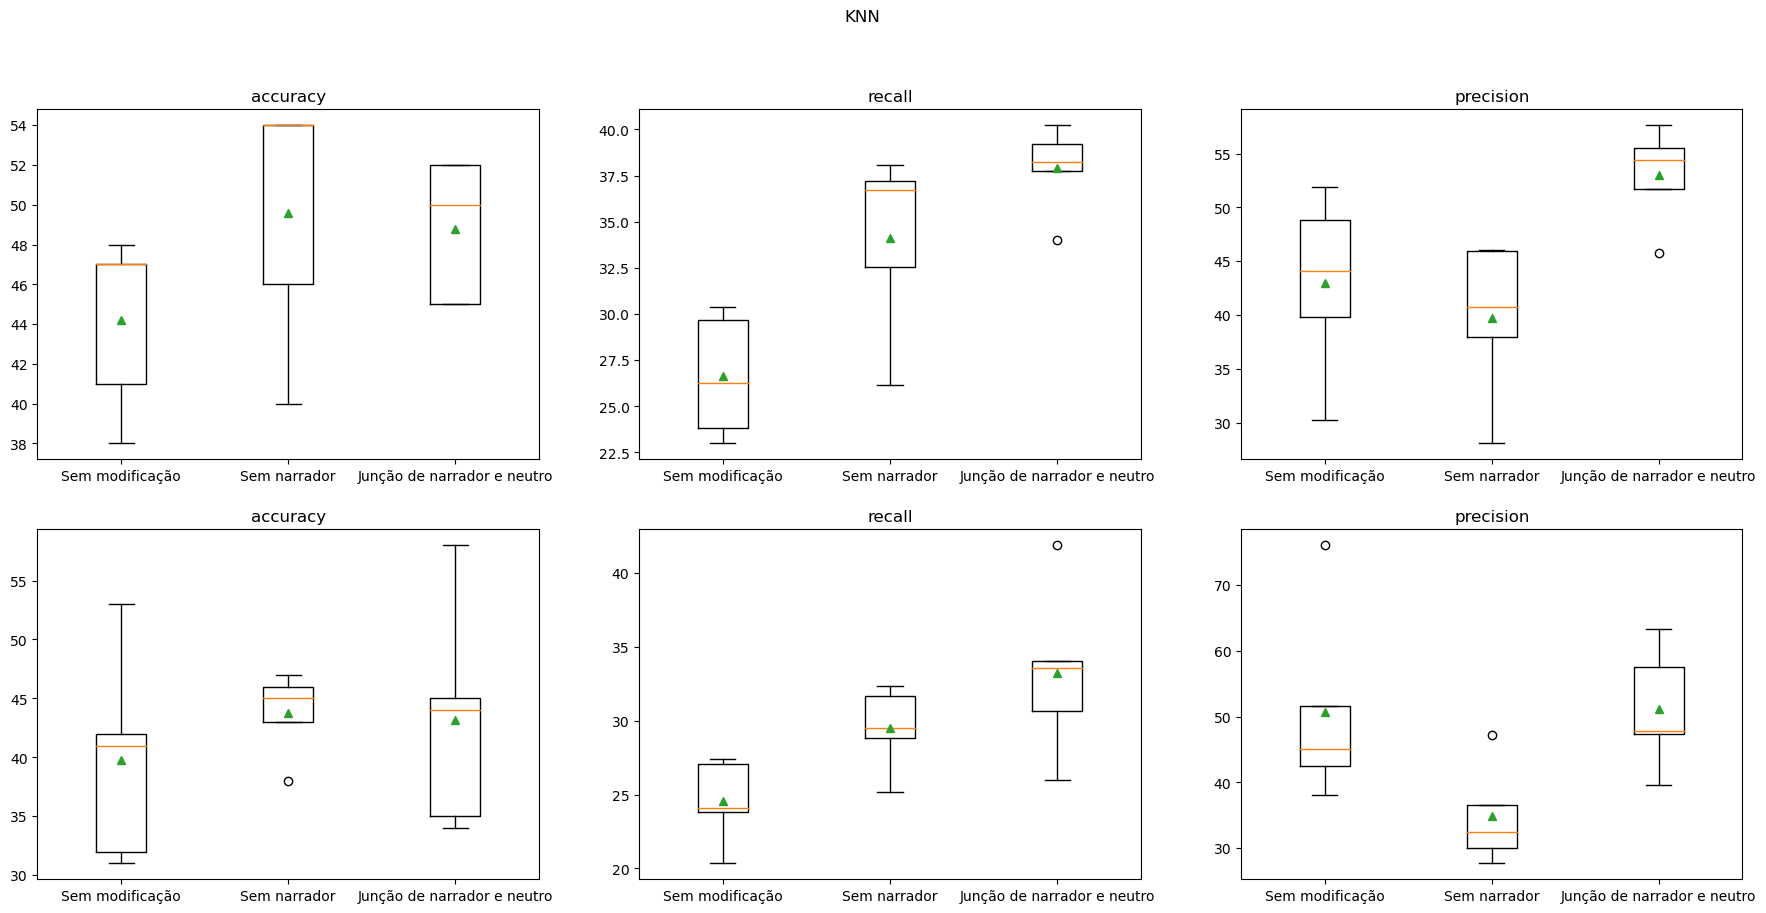

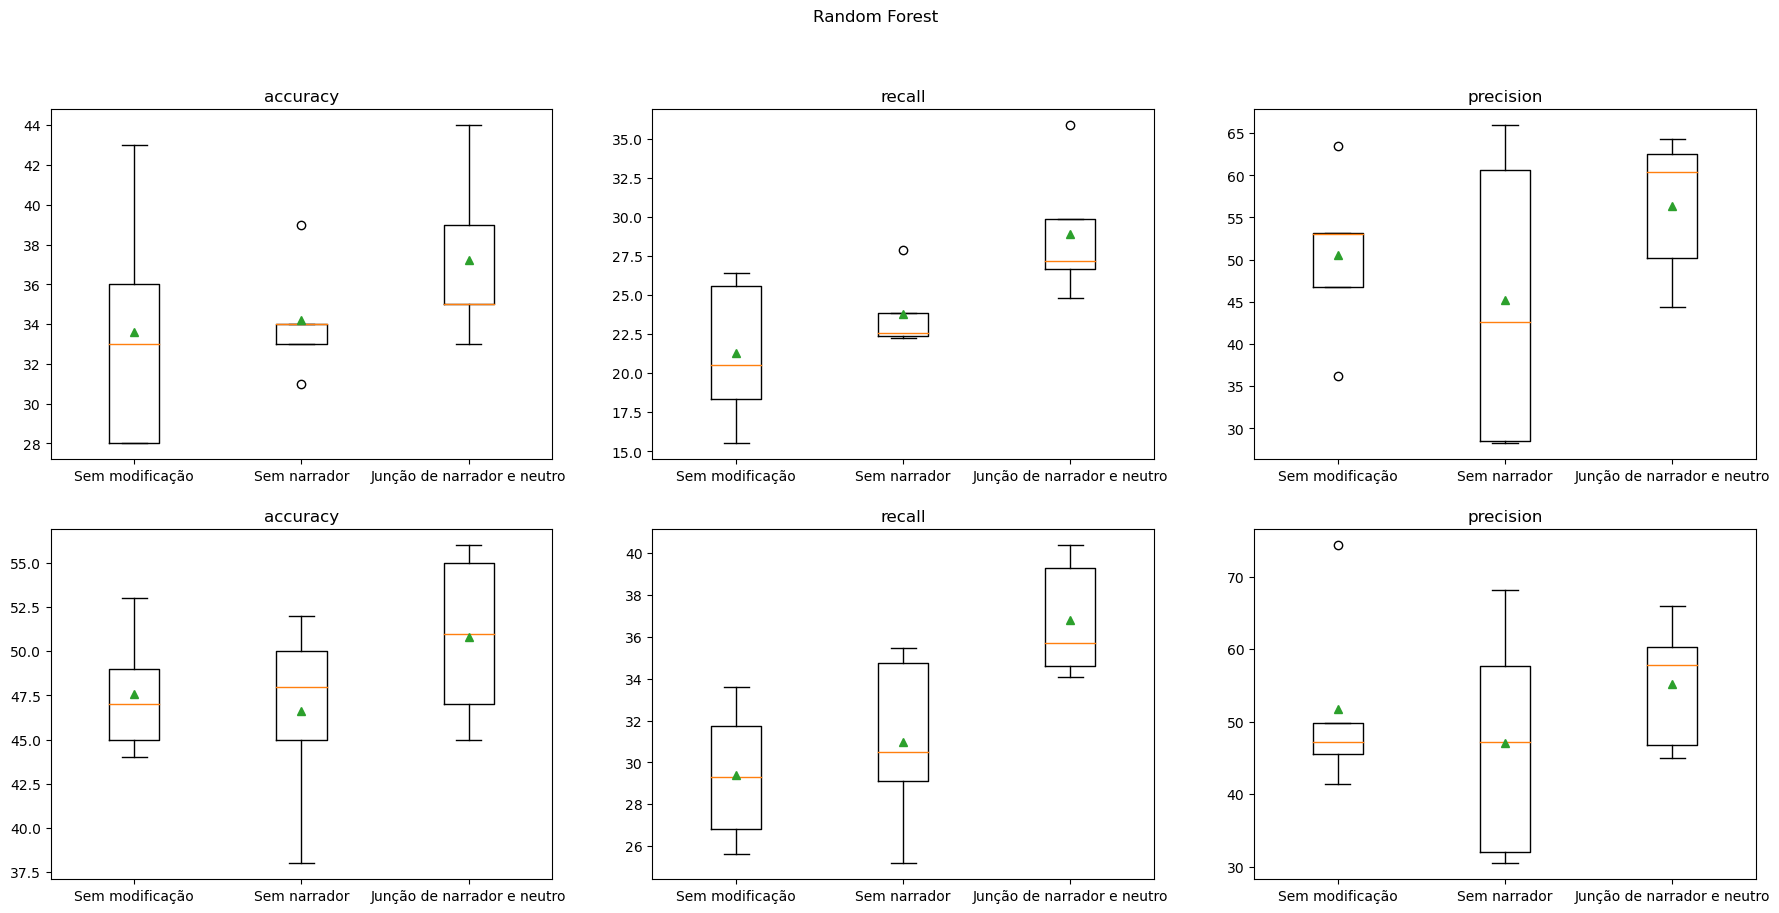

In [106]:
compare_boxplot(metrics, data_operations)

# Visualizations 

In [ ]:
from visualizations import compare_boxplot

In [ ]:
compare_boxplot(metrics, labels)

In [ ]:


compare_boxplot()